In [43]:
%matplotlib inline
import numpy as np
import pymc3 as pm
import pylab as plt
import pandas as pd

# Set seed
np.random.seed(10011)

(array([ 43.,  77.,  16.,   0.,   0.,   0.,   0.,  15.,  41.,   8.]),
 array([  6.41219761,   6.84310132,   7.27400503,   7.70490875,
          8.13581246,   8.56671618,   8.99761989,   9.4285236 ,
          9.85942732,  10.29033103,  10.72123474]),
 <a list of 10 Patch objects>)

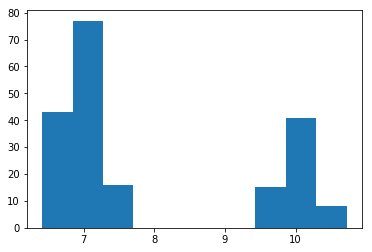

In [44]:
import numpy as np
# Write answer here
# question 1
n_sample = 200
delta = 0.7
flag = np.random.uniform(0,1,n_sample) < 0.7
y = flag*np.random.normal(loc=7, scale=0.25, size=n_sample) \
    +(1-flag)*np.random.normal(loc=10, scale=0.25, size=n_sample)
plt.hist(y)

In [53]:
from scipy.stats import distributions
norm = distributions.norm.pdf

def calc_posterior(delta, y):
    prob = delta*norm(y, loc=7, scale=0.25) + (1-delta)*norm(y, loc=10, scale=0.25)
    return np.sum(np.log(prob))

def metropolis(n_iterations, initial_values, param):               
    # Initialize trace for parameters
    trace = np.empty(n_iterations+1)
    
    # Set initial values
    trace[0] = initial_values
        
    # Calculate joint posterior for initial values
    if param == 'delta':
        current_log_prob = calc_posterior(initial_values, y)
    elif param == 'unif':
        current_log_prob = calc_posterior(np.exp(initial_values)/(1+np.exp(initial_values)), y)
    
    # Initialize acceptance counts
    accepted = 0
    
    for i in range(n_iterations):
    
        if not i%10000: print('Iteration %i' % i)
    
        # Grab current parameter values
        current_params = trace[i]
        
        error = np.random.uniform(-1,1)
        proposed = current_params + error
    
        # Calculate log posterior with proposed value
        if param == 'delta':
            proposed_log_prob = calc_posterior(proposed, y)
        elif param == 'unif':
            proposed_log_prob = calc_posterior(np.exp(proposed)/(1+np.exp(proposed)), y)
        
        # Log-acceptance rate
        alpha = proposed_log_prob - current_log_prob

        # Sample a uniform random variate
        u = np.random.rand()

        # Test proposed value
        if np.log(u) < alpha:
            # Accept
            trace[i+1] = proposed
            current_log_prob = proposed_log_prob
            accepted += 1
        else:
            # Reject
            trace[i+1] = trace[i]
    
    plt.plot(trace)
    if param == 'delta':
        print("The estimated $\delta$ is {0: .4f} and the number of accepted is {1: }"
          .format(trace[-1], accepted))
    elif param == 'unif':
        print("The estimated $\delta$ is {0: .4f} and the number of accepted is {1: }"
          .format(np.exp(trace[-1])/(1+np.exp(trace[-1])), accepted))

Iteration 0
Iteration 10000
Iteration 20000
Iteration 30000
Iteration 40000
Iteration 50000
Iteration 60000
Iteration 70000
Iteration 80000
Iteration 90000
The estimated $\delta$ is  0.7071552370750069 and the number of accepted is  5396


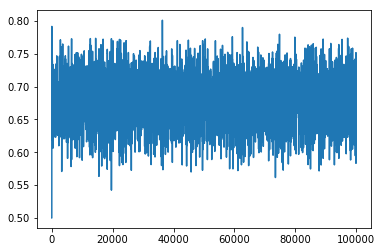

In [54]:
metropolis(10**5, 0.5, 'delta')

Iteration 0
Iteration 10000
Iteration 20000
Iteration 30000
Iteration 40000
Iteration 50000
Iteration 60000
Iteration 70000
Iteration 80000
Iteration 90000
The accepted value is  0.6723585914193911 at the  24190th round


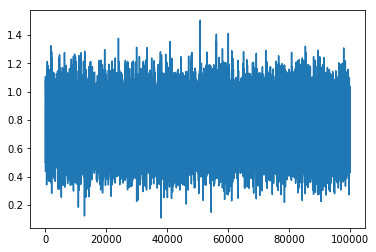

In [48]:
metropolis(10**5, 0.5, 'unif')